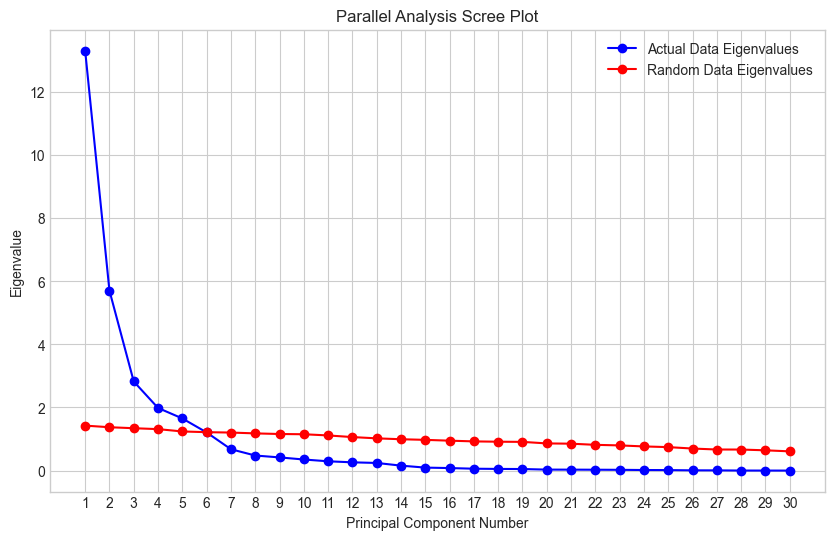


--- Parallel Analysis Result ---
Number of components to retain based on the strict rule: 5


--- Component Loadings ---
Showing loadings for the first 6 components:
                              PC1       PC2       PC3       PC4       PC5  \
mean radius              0.218902 -0.233857 -0.008531 -0.041409 -0.037786   
mean texture             0.103725 -0.059706  0.064550  0.603050  0.049469   
mean perimeter           0.227537 -0.215181 -0.009314 -0.041983 -0.037375   
mean area                0.220995 -0.231077  0.028700 -0.053434 -0.010331   
mean smoothness          0.142590  0.186113 -0.104292 -0.159383  0.365089   
mean compactness         0.239285  0.151892 -0.074092 -0.031795 -0.011704   
mean concavity           0.258400  0.060165  0.002734 -0.019123 -0.086375   
mean concave points      0.260854 -0.034768 -0.025564 -0.065336  0.043861   
mean symmetry            0.138167  0.190349 -0.040240 -0.067125  0.305941   
mean fractal dimension   0.064363  0.366575 -0.022574 -0.048587

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Introduction to Parallel Analysis ---
# Parallel Analysis is a method to determine the number of components to retain
# in a Principal Component Analysis (PCA). It works by comparing the eigenvalues
# of the actual data with the eigenvalues of a random dataset of the same dimensions.
# The idea is to retain only those components from the actual data whose eigenvalues
# are greater than the corresponding eigenvalues from the random data. This helps
# to ensure that the retained components represent more than just random noise.

# --- 1. Load and Scale the Data ---
# PCA is sensitive to the scale of the features, so it's a standard and crucial
# practice to scale the data before applying PCA. We'll use StandardScaler to
# ensure each feature has a mean of 0 and a standard deviation of 1.
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Perform PCA on the Actual Data ---
# We calculate the eigenvalues for the principal components of our real, scaled data.
pca_real = PCA()
pca_real.fit(X_scaled)
real_eigenvalues = pca_real.explained_variance_

# --- 3. Perform PCA on Random Data ---
# Now, we create a random dataset with the same shape as our original data
# and calculate the eigenvalues from its PCA. This gives us a baseline
# representing the eigenvalues produced by random noise.
n_samples, n_features = X.shape
random_data = np.random.randn(n_samples, n_features)

pca_random = PCA()
pca_random.fit(random_data)
random_eigenvalues = pca_random.explained_variance_

# --- 4. Plot the Results (Scree Plot) ---
# We plot both sets of eigenvalues on a scree plot. The point where the line for
# the real eigenvalues crosses below the line for the random eigenvalues suggests
# the cutoff point for the number of components to keep.

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(real_eigenvalues) + 1), real_eigenvalues, 'b-o', label='Actual Data Eigenvalues')
plt.plot(range(1, len(random_eigenvalues) + 1), random_eigenvalues, 'r-o', label='Random Data Eigenvalues')
plt.title('Parallel Analysis Scree Plot')
plt.xlabel('Principal Component Number')
plt.ylabel('Eigenvalue')
plt.legend()
plt.xticks(range(1, len(real_eigenvalues) + 1))
plt.grid(True)
plt.show()

# --- 5. Determine the Number of Components to Retain ---
# We programmatically find the number of components where the real eigenvalue
# is greater than the random eigenvalue.
num_components_to_retain = np.sum(real_eigenvalues > random_eigenvalues)
print(f"\n--- Parallel Analysis Result ---")
print(f"Number of components to retain based on the strict rule: {num_components_to_retain}")
print("\n")

# --- 6. Examine Component Loadings ---
# Component loadings are the correlation coefficients between the original variables
# and the new principal components. They show how much each original feature
# contributes to a given component. A high absolute value indicates a strong
# contribution. We will create a DataFrame to view these loadings easily.

# --- How to Interpret Loadings: ---
# - Sign (+/-): A positive loading means the variable and the component are positively correlated.
#   A negative loading means they are negatively correlated (one goes up as the other goes down).
# - Magnitude: The absolute value of the loading indicates the strength of the relationship.
#   Loadings > 0.4 or < -0.4 are often considered significant.
# - Naming Components: By looking at which variables have high loadings on a component,
#   we can give it an interpretable name (e.g., "Tumor Size & Shape Component").

# --- Good vs. Bad Extra Component: ---
# - A "Good" Component: Has high loadings for a group of related variables. It represents a clear,
#   interpretable concept (e.g., all size-related variables load highly). It adds meaningful information.
# - A "Bad" Component (Noise): Has no high loadings, or maybe one weak loading. The loadings are
#   scattered without a clear pattern. It's hard to interpret and likely just represents random noise.
#   This aligns with what the parallel analysis scree plot suggests.

# We will show the loadings for the recommended number of components + 1 for further inspection.
num_components_to_show = num_components_to_retain + 1

# Get the loadings for the components we decided to show
loadings = pca_real.components_[:num_components_to_show, :]

# Create a DataFrame for better readability
component_names = [f'PC{i+1}' for i in range(num_components_to_show)]
loadings_df = pd.DataFrame(loadings.T, columns=component_names, index=cancer.feature_names)

print("--- Component Loadings ---")
print(f"Showing loadings for the first {num_components_to_show} components:")
print(loadings_df)

# To get a better sense of which features are most important for a component,
# we can sort the loadings for a specific component. For example, for PC1:
print("\n--- Top 5 Features for PC1 (by absolute loading) ---")
sorted_loadings_pc1 = loadings_df['PC1'].abs().sort_values(ascending=False)
print(sorted_loadings_pc1.head())


In [2]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
